In [21]:
# import json 
import pandas as pd 
import re
import numpy as np
# from mtgsdk import Card
# import numpy as np

from sklearn.cluster import KMeans
from sklearn import preprocessing
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model

import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import plotly.express as px
import hvplot.pandas
%matplotlib inline

In [2]:
UNWANTED_COLUMNS = ['index', 'artist', 'availability', 'borderColor',
       'colors', 'convertedManaCost', 'edhrecRank', 'finishes', 'flavorText',
       'foreignData', 'frameVersion', 'hasFoil', 'hasNonFoil', 'identifiers',
       'isPromo', 'isReprint', 'isStarter', 'keywords', 'language', 'layout',
       'legalities','number',
       'printings', 'promoTypes', 'purchaseUrls', 'rarity', 'rulings',
       'securityStamp', 'setCode', 'subtypes', 'supertypes', 'text','uuid', 'boosterTypes', 'originalText',
       'originalType', 'signature', 'originalReleaseDate', 'variations',
       'isOnlineOnly', 'isReserved', 'frameEffects', 'faceConvertedManaCost',
       'faceManaValue', 'faceName', 'leadershipSkills', 'otherFaceIds', 'side',
       'isOversized', 'reverseRelated', 'duelDeck', 'isTextless',
       'relatedCards', 'watermark', 'loyalty', 'isAlternative', 'isFunny',
       'isFullArt', 'isTimeshifted', 'rebalancedPrintings', 'asciiName',
       'isRebalanced', 'originalPrintings', 'colorIndicator', 'hand', 'life',
       'isStorySpotlight', 'flavorName', 'attractionLights',
       'hasContentWarning', 'hasAlternativeDeckLimit', 'faceFlavorName',
       'cardParts']
COLOR_COLUMNS = ["colorIdentity","manaCost", "types", "power", "toughness"]
FILE_NAME = "second_transposed.feather"
LETTERS = ['B','C','G','H','P','R','S','U','W','X','Y','Z']

In [3]:
mtg_df = pd.read_feather(FILE_NAME).drop_duplicates("name", keep="first").drop(columns=UNWANTED_COLUMNS)
mtg_df

,colorIdentity,manaCost,manaValue,name,power,toughness,type,types
0,[U],{5}{U}{U},7.0,Sphinx of the Final Word,5,5,Creature — Sphinx,[Creature]
1,[R],{1}{R}{R},3.0,Goblin King,2,2,Creature — Goblin,[Creature]
2,[G],{G},1.0,Caravan Vigil,None,None,Sorcery,[Sorcery]
3,"[G, R]",{3}{R}{G},5.0,Deadshot Minotaur,3,4,Creature — Minotaur,[Creature]
4,[W],{2}{W},3.0,Rule of Law,None,None,Enchantment,[Enchantment]
...,...,...,...,...,...,...,...,...
77661,[B],{4}{B},5.0,Plague Dogs,3,3,Creature — Phyrexian Zombie Dog,[Creature]
77674,[R],{1}{R}{R},3.0,Traitorous Blood,None,None,Sorcery,[Sorcery]
77705,[],{7},7.0,Aether Searcher,6,4,Artifact Creature — Construct,"[Artifact, Creature]"
77717,[],{3},3.0,Network Terminal,None,None,Artifact,[Artifact]


In [27]:
mtg_df.dropna(axis=0,how='any')

mtg_df["power"].dtypes

dtype('O')

In [5]:
def parse_mana_cost(raw):
    if raw is None: 
        return None
    else: 
        colors = {k: raw.count(k) for k in LETTERS}
        return pd.Series(colors)       

In [6]:
[parse_mana_cost(value) for value in mtg_df["manaCost"].values.tolist()] 

[B    0
 C    0
 G    0
 H    0
 P    0
 R    0
 S    0
 U    2
 W    0
 X    0
 Y    0
 Z    0
 dtype: int64,
 B    0
 C    0
 G    0
 H    0
 P    0
 R    2
 S    0
 U    0
 W    0
 X    0
 Y    0
 Z    0
 dtype: int64,
 B    0
 C    0
 G    1
 H    0
 P    0
 R    0
 S    0
 U    0
 W    0
 X    0
 Y    0
 Z    0
 dtype: int64,
 B    0
 C    0
 G    1
 H    0
 P    0
 R    1
 S    0
 U    0
 W    0
 X    0
 Y    0
 Z    0
 dtype: int64,
 B    0
 C    0
 G    0
 H    0
 P    0
 R    0
 S    0
 U    0
 W    1
 X    0
 Y    0
 Z    0
 dtype: int64,
 B    0
 C    0
 G    0
 H    0
 P    0
 R    0
 S    0
 U    1
 W    0
 X    0
 Y    0
 Z    0
 dtype: int64,
 B    0
 C    0
 G    0
 H    0
 P    0
 R    0
 S    0
 U    0
 W    1
 X    0
 Y    0
 Z    0
 dtype: int64,
 B    0
 C    0
 G    0
 H    0
 P    0
 R    0
 S    0
 U    0
 W    1
 X    0
 Y    0
 Z    0
 dtype: int64,
 B    1
 C    0
 G    0
 H    0
 P    0
 R    0
 S    0
 U    0
 W    0
 X    0
 Y    0
 Z    0
 dtype: int64,
 

In [45]:
parsed_series = mtg_df["manaCost"].apply(parse_mana_cost)
mana_cost_colors_df = pd.DataFrame(parsed_series)


# KMeans Algorithm For Mana Cost


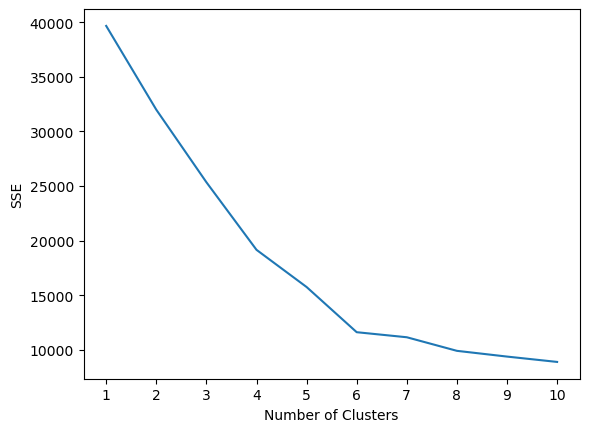

In [46]:
#initialize kmeans parameters
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(mana_cost_colors_df)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

# KMeans clustering if k= 6

In [56]:
kmeans6 = KMeans(n_clusters=6)

x = mana_cost_colors_df.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11]].values
y_kmeans6=kmeans6.fit_predict(x)
print(y_kmeans6)


[1 2 4 ... 0 0 3]


In [57]:
kmeans5.cluster_centers_

array([[ 1.05764146e-03,  3.79470760e-19,  1.31940772e+00,
        -1.76182853e-19,  1.85087255e-03,  2.37969328e-03,
        -3.52365706e-19,  1.58646219e-03,  2.06240085e-02,
         2.35325225e-02, -1.76182853e-19, -1.76182853e-19],
       [ 3.87477187e-02,  1.40390285e-03,  5.20847957e-02,
         1.40390285e-04,  8.42341710e-04,  4.00112312e-02,
         2.80780570e-04,  5.47522111e-02,  8.35041415e-01,
         1.05292714e-02, -1.62630326e-19, -1.62630326e-19],
       [ 1.05339705e-01,  2.07770621e-04,  9.03802202e-02,
        -1.89735380e-19,  1.66216497e-03,  1.26407646e+00,
        -3.79470760e-19,  8.16538541e-02,  3.01267401e-02,
         2.38936214e-02,  2.07770621e-04,  2.07770621e-04],
       [ 1.34162333e+00,  1.46367293e-18,  6.57924486e-02,
        -1.89735380e-19,  2.48699977e-03,  3.16527244e-03,
        -3.79470760e-19,  7.77752657e-02,  1.89916346e-02,
         1.65046349e-02, -1.89735380e-19, -1.89735380e-19],
       [ 2.96882731e-03,  8.13151629e-19,  6.3582385

In [58]:
from sklearn.decomposition import PCA 
pca = PCA(n_components = 7)
pca.fit(x)
pca_df=pca.transform(x)


In [59]:
km = KMeans(n_clusters=7)
km.fit(x)

KMeans(n_clusters=7)

In [60]:
pca_df

array([[-4.42013516e-01, -1.61762797e+00,  2.46263770e-01, ...,
         2.85881248e-01, -2.99481585e-02, -7.19579553e-04],
       [-2.84476248e-01,  4.74324250e-01, -1.64436522e+00, ...,
         3.29152864e-01, -3.04163193e-02, -1.89166269e-03],
       [-3.45825769e-01,  5.40119421e-01,  5.35174150e-01, ...,
        -1.53683738e-01, -1.79118506e-02, -1.28081262e-03],
       ...,
       [-3.23303845e-02,  6.59850799e-03, -1.13924417e-02, ...,
        -5.96384437e-01, -7.12832906e-03, -6.58654919e-04],
       [-3.23303845e-02,  6.59850799e-03, -1.13924417e-02, ...,
        -5.96384437e-01, -7.12832906e-03, -6.58654919e-04],
       [-2.14687907e-01,  6.31498141e-03,  5.22483017e-02, ...,
        -1.24440099e-01, -9.16520436e-03, -1.09644377e-03]])

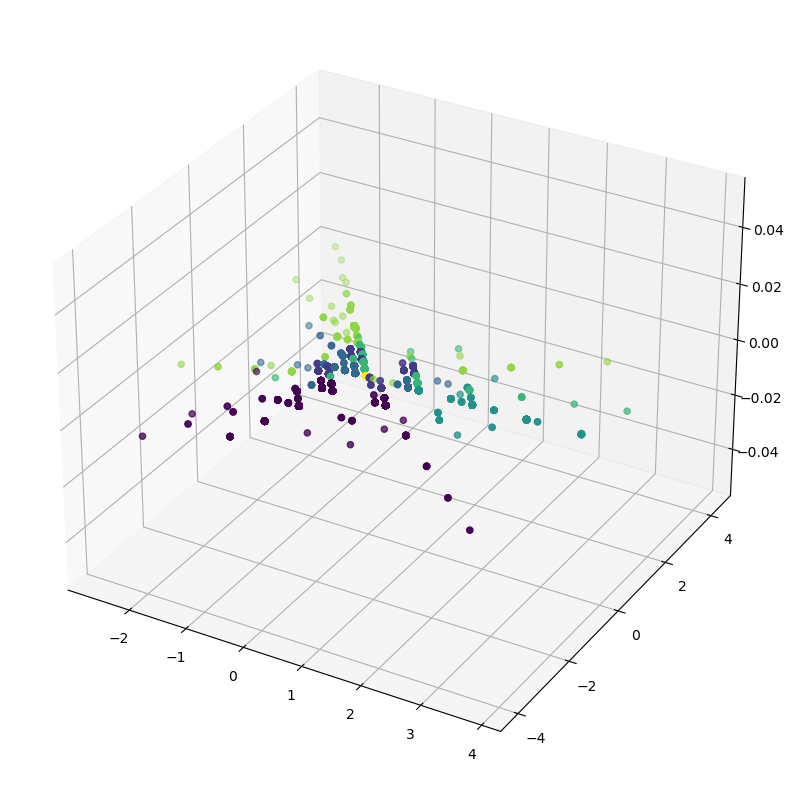

In [61]:
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(projection="3d")
ax.scatter(pca_df[:,0], pca_df[:,1],c=km.labels_)

# Reference 


In [13]:
# clean = raw.replace('{', '').replace('}', '')

In [14]:
# test_df.join(mana_cost_colors_df)

NameError: name 'test_df' is not defined

In [ ]:
# "hello".count("l")
# '\d*
def count_digit_groups(s): 
    matches = re.findall('(\d+)', s)
    len_groups = len(matches)
    if len_groups > 1: 
        print(s)    
    return len_groups

In [ ]:
count_digit_groups("hello")

In [ ]:
raw_values = [value for value in mtg_df["manaCost"].values.tolist() if value is not None]
big_string = "".join(raw_values)
character_set = set(big_string)

In [ ]:
test_df.join(mana_cost_colors_df)

In [ ]:
parse_mana_cost(mtg_df["manaCost"][0])

In [ ]:
digit_groups = [count_digit_groups(value) for value in mtg_df["manaCost"].values.tolist() if value is not None]

In [ ]:
print(min(digit_groups), max(digit_groups))

In [ ]:
# When the return value was a dictionary 

parsed_series=test_df["manaCost"].apply(parse_mana_cost)
parsed_series
# pd.DataFrame(parsed_series.tolist(), index=parsed_series.index)